<a href="https://colab.research.google.com/github/JahnaviRamagiri/EVA-B2/blob/master/S12_YOLO/12_B_Annotation/S12_B__Final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import pandas as pd
import json

In [27]:
dog_annt = json.load(open('Dog_annotation_json.json'))

In [28]:
print(dog_annt)

{'D01.jpg7176': {'filename': 'D01.jpg', 'size': 7176, 'regions': [{'shape_attributes': {'name': 'rect', 'x': 42, 'y': 43, 'width': 160, 'height': 102}, 'region_attributes': {'Class': 'Dog', 'ID': 'D01', 'Caption': "Mamma Dog playing with it's Pup!"}}, {'shape_attributes': {'name': 'rect', 'x': 158, 'y': 44, 'width': 114, 'height': 93}, 'region_attributes': {'Class': 'Dog', 'ID': 'D01', 'Caption': 'Pup!'}}], 'file_attributes': {'caption': '', 'public_domain': 'no', 'image_url': ''}}, 'D02.jpg6067': {'filename': 'D02.jpg', 'size': 6067, 'regions': [{'shape_attributes': {'name': 'rect', 'x': 100, 'y': 46, 'width': 103, 'height': 114}, 'region_attributes': {'Class': 'Dog', 'ID': 'D02', 'Caption': 'Puppy in the garden'}}], 'file_attributes': {'caption': '', 'public_domain': 'no', 'image_url': ''}}, 'D03.jpg8600': {'filename': 'D03.jpg', 'size': 8600, 'regions': [{'shape_attributes': {'name': 'rect', 'x': 0, 'y': 4, 'width': 219, 'height': 224}, 'region_attributes': {'Class': 'Dog', 'ID': 'D

In [29]:
df = pd.read_json ('Dog_annotation_json.json')
print (df)

                                                       D01.jpg7176  ...                                        D50.jpg5975
filename                                                   D01.jpg  ...                                            D50.jpg
size                                                          7176  ...                                               5975
regions          [{'shape_attributes': {'name': 'rect', 'x': 42...  ...  [{'shape_attributes': {'name': 'rect', 'x': 45...
file_attributes  {'caption': '', 'public_domain': 'no', 'image_...  ...  {'caption': '', 'public_domain': 'no', 'image_...

[4 rows x 50 columns]


In [30]:
json.dumps(dog_annt)

'{"D01.jpg7176": {"filename": "D01.jpg", "size": 7176, "regions": [{"shape_attributes": {"name": "rect", "x": 42, "y": 43, "width": 160, "height": 102}, "region_attributes": {"Class": "Dog", "ID": "D01", "Caption": "Mamma Dog playing with it\'s Pup!"}}, {"shape_attributes": {"name": "rect", "x": 158, "y": 44, "width": 114, "height": 93}, "region_attributes": {"Class": "Dog", "ID": "D01", "Caption": "Pup!"}}], "file_attributes": {"caption": "", "public_domain": "no", "image_url": ""}}, "D02.jpg6067": {"filename": "D02.jpg", "size": 6067, "regions": [{"shape_attributes": {"name": "rect", "x": 100, "y": 46, "width": 103, "height": 114}, "region_attributes": {"Class": "Dog", "ID": "D02", "Caption": "Puppy in the garden"}}], "file_attributes": {"caption": "", "public_domain": "no", "image_url": ""}}, "D03.jpg8600": {"filename": "D03.jpg", "size": 8600, "regions": [{"shape_attributes": {"name": "rect", "x": 0, "y": 4, "width": 219, "height": 224}, "region_attributes": {"Class": "Dog", "ID": 

In [31]:
dog_annt.items()

dict_items([('D01.jpg7176', {'filename': 'D01.jpg', 'size': 7176, 'regions': [{'shape_attributes': {'name': 'rect', 'x': 42, 'y': 43, 'width': 160, 'height': 102}, 'region_attributes': {'Class': 'Dog', 'ID': 'D01', 'Caption': "Mamma Dog playing with it's Pup!"}}, {'shape_attributes': {'name': 'rect', 'x': 158, 'y': 44, 'width': 114, 'height': 93}, 'region_attributes': {'Class': 'Dog', 'ID': 'D01', 'Caption': 'Pup!'}}], 'file_attributes': {'caption': '', 'public_domain': 'no', 'image_url': ''}}), ('D02.jpg6067', {'filename': 'D02.jpg', 'size': 6067, 'regions': [{'shape_attributes': {'name': 'rect', 'x': 100, 'y': 46, 'width': 103, 'height': 114}, 'region_attributes': {'Class': 'Dog', 'ID': 'D02', 'Caption': 'Puppy in the garden'}}], 'file_attributes': {'caption': '', 'public_domain': 'no', 'image_url': ''}}), ('D03.jpg8600', {'filename': 'D03.jpg', 'size': 8600, 'regions': [{'shape_attributes': {'name': 'rect', 'x': 0, 'y': 4, 'width': 219, 'height': 224}, 'region_attributes': {'Class':

In [32]:
table = pd.DataFrame()

In [33]:
print(table)

Empty DataFrame
Columns: []
Index: []


In [34]:
import PIL
table=[]
for keys, values in dog_annt.items():
  for row in values['regions']:
    reg_attr = row['region_attributes']
    rec = {'Name': values['filename'] }
    image = PIL.Image.open(values["filename"])
    #rec['Image'] = image.show(values["filename"])
    rec['ID'] = reg_attr['ID']
    rec['Caption'] = reg_attr['Caption']
    #image size
    
    #print(f"D0{i}.jpg")
    width, height = image.size
    rec['ImSize_x'] = width
    rec['ImSize_y'] = height   
    
    
    shape = row['shape_attributes']
    rec['BBW'] = shape['width']
    rec['BBH'] = shape['height']
    rec['x'] = shape['x']
    rec['y'] = shape['y']
    rec['Cen_x'] = shape['x']+shape['width']/2
    rec['Cen_y'] = shape['y']+shape['height']/2
    table.append(rec)
 

'''for i in range(1,10):
    image = PIL.Image.open(f"D0{i}.jpg")
    print(f"D0{i}.jpg")
    width, height = image.size
    rec['sizex'] = width
    rec['sizey'] = height
    print(width,height)
    table.append(rec)

for i in range(10,51):
    image = PIL.Image.open(f"D{i}.jpg")
    width, height = image.size
    rec['sizex'] = width
    rec['sizey'] = height
    table.append(rec) '''
t = pd.DataFrame.from_dict(table, orient='columns')
t

,Name,ID,Caption,ImSize_x,ImSize_y,BBW,BBH,x,y,Cen_x,Cen_y
0,D01.jpg,D01,Mamma Dog playing with it's Pup!,300,168,160,102,42,43,122.0,94.0
1,D01.jpg,D01,Pup!,300,168,114,93,158,44,215.0,90.5
2,D02.jpg,D02,Puppy in the garden,259,194,103,114,100,46,151.5,103.0
3,D03.jpg,D03,Doggy Reading a book with specs!,220,229,219,224,0,4,109.5,116.0
4,D04.jpg,D04,Pomeranian going for a walk.,275,183,118,178,42,1,101.0,90.0
5,D04.jpg,D04,Co-Pomeranian!,275,183,104,146,146,30,198.0,103.0
6,D05.jpg,D05,Pup pulling the rope,275,183,107,154,98,6,151.5,83.0
7,D06.jpg,D06,Pup in the garden,275,183,131,154,77,17,142.5,94.0
8,D07.jpg,D07,Dog under the blanket,225,224,148,181,30,32,104.0,122.5
9,D08.jpg,D08,The surprised toy-like dog!,300,168,124,143,86,24,148.0,95.5


In [35]:
print(t['x'][0])

42


In [36]:
t_norm=[]
X = []
#rec1.clear()
for keys, values in dog_annt.items():
  for row in values['regions']:
    reg_attr = row['region_attributes']
    rec = {'Name': values['filename'] }
    rec1 = {'Name': values['filename'] }
    #rec['ID'] = reg_attr['ID']
    #image size
    image = PIL.Image.open(values["filename"])
    #print(f"D0{i}.jpg")
    width, height = image.size
    rec['ImSize_x'] = width
    rec['ImSize_y'] = height 
    rec['Norm_Sx'] = width/width
    rec['Norm_Sy'] = height/height 
    
    
    #rec['Caption'] = reg_attr['Caption']

    shape = row['shape_attributes']
    rec['Norm_BBW'] = shape['width']/width
    rec1['Norm_BBW'] = shape['width']/width
    rec['Norm_BBH'] = shape['height']/height
    rec1['Norm_BBH'] = shape['height']/height
    
    t_norm.append(rec)
    X.append(rec1)
t_n = pd.DataFrame.from_dict(t_norm, orient='columns')
t_n

,Name,ImSize_x,ImSize_y,Norm_Sx,Norm_Sy,Norm_BBW,Norm_BBH
0,D01.jpg,300,168,1.0,1.0,0.533333,0.607143
1,D01.jpg,300,168,1.0,1.0,0.380000,0.553571
2,D02.jpg,259,194,1.0,1.0,0.397683,0.587629
3,D03.jpg,220,229,1.0,1.0,0.995455,0.978166
4,D04.jpg,275,183,1.0,1.0,0.429091,0.972678
5,D04.jpg,275,183,1.0,1.0,0.378182,0.797814
6,D05.jpg,275,183,1.0,1.0,0.389091,0.841530
7,D06.jpg,275,183,1.0,1.0,0.476364,0.841530
8,D07.jpg,225,224,1.0,1.0,0.657778,0.808036
9,D08.jpg,300,168,1.0,1.0,0.413333,0.851190


In [37]:
splot = pd.DataFrame.from_dict(X)
splot

,Name,Norm_BBW,Norm_BBH
0,D01.jpg,0.533333,0.607143
1,D01.jpg,0.380000,0.553571
2,D02.jpg,0.397683,0.587629
3,D03.jpg,0.995455,0.978166
4,D04.jpg,0.429091,0.972678
5,D04.jpg,0.378182,0.797814
6,D05.jpg,0.389091,0.841530
7,D06.jpg,0.476364,0.841530
8,D07.jpg,0.657778,0.808036
9,D08.jpg,0.413333,0.851190


In [38]:
X = [ [k,v] for k, v in splot.items() ]
X_array = np.array(X)
print(X_array.shape)



(3, 2)


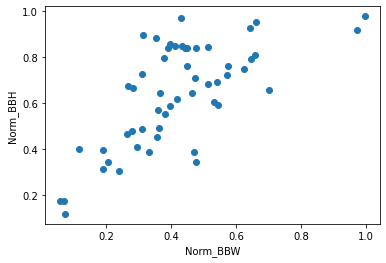

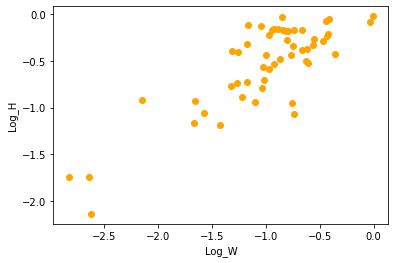

In [39]:

x=t_n['Norm_BBW']
y=t_n['Norm_BBH']
logw = np.log(x)
logh = np.log(y)
plt.scatter(x, y)
plt.xlabel("Norm_BBW")
plt.ylabel("Norm_BBH")
plt.show()
plt.scatter(logw,logh,c='orange')
plt.xlabel("Log_W")
plt.ylabel("Log_H")
plt.show()

In [40]:
'''arr=[logw]
arr1 = np.append(arr,logh)
arr1=np.reshape(arr1,(54, 2),'F')
arr1
#np.append(arr1,y,axis=1)'''

arr=[x]
arr1 = np.append(arr,y)
bb=np.reshape(arr1,(54, 2),'F')
bb

array([[0.53333333, 0.60714286],
       [0.38      , 0.55357143],
       [0.3976834 , 0.58762887],
       [0.99545455, 0.97816594],
       [0.42909091, 0.9726776 ],
       [0.37818182, 0.79781421],
       [0.38909091, 0.84153005],
       [0.47636364, 0.84153005],
       [0.65777778, 0.80803571],
       [0.41333333, 0.85119048],
       [0.4691358 , 0.38709677],
       [0.64363636, 0.92896175],
       [0.97090909, 0.91803279],
       [0.66206897, 0.95402299],
       [0.29433962, 0.41052632],
       [0.62545455, 0.74863388],
       [0.64727273, 0.79234973],
       [0.70181818, 0.6557377 ],
       [0.26545455, 0.46448087],
       [0.44333333, 0.83928571],
       [0.57090909, 0.72131148],
       [0.39636364, 0.8579235 ],
       [0.35842294, 0.56906077],
       [0.54545455, 0.59388646],
       [0.41800643, 0.61728395],
       [0.07099698, 0.175     ],
       [0.05891239, 0.175     ],
       [0.07250755, 0.1175    ],
       [0.47272727, 0.71038251],
       [0.31272727, 0.89617486],
       [0.

Text(0, 0.5, 'Norm_BBH')

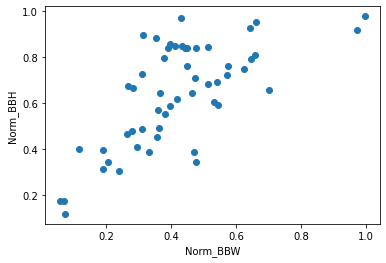

In [51]:
plt.scatter(bb[:,0], bb[:,1])
plt.xlabel("Norm_BBW")
plt.ylabel("Norm_BBH")

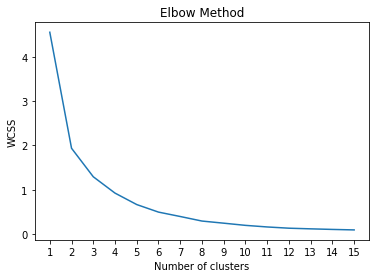

In [42]:
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=50, n_init=10, random_state=0)
    kmeans.fit(bb)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 16), wcss)
plt.title('Elbow Method')
plt.xticks(np.arange(1,16))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Best no of clusters: 7 ; The WCSS curve gets flattened after that.

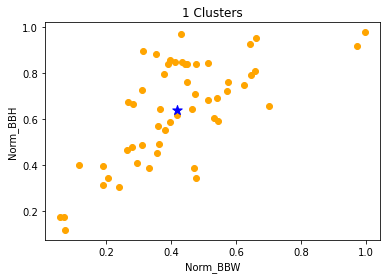

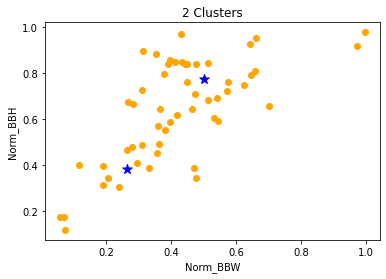

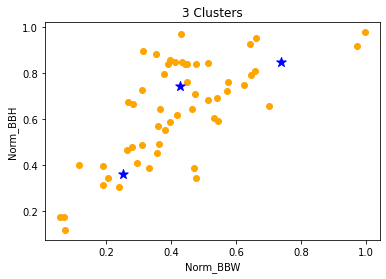

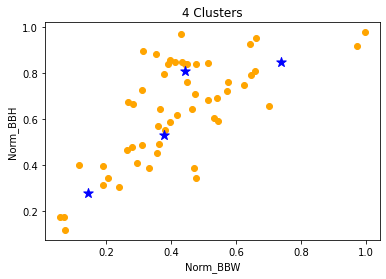

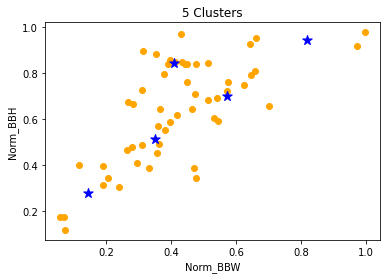

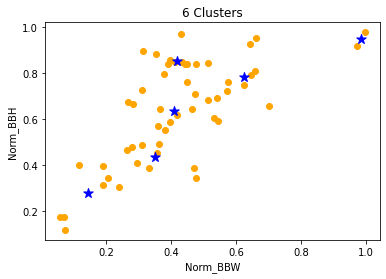

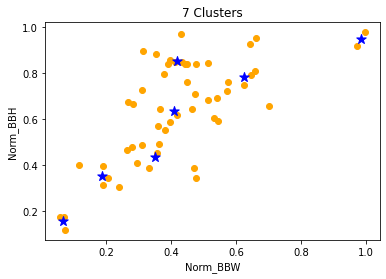

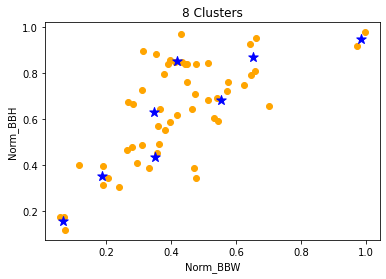

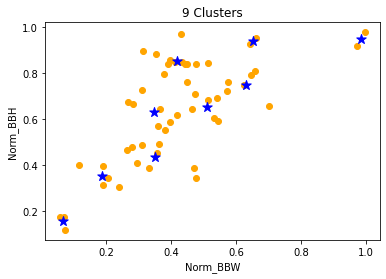

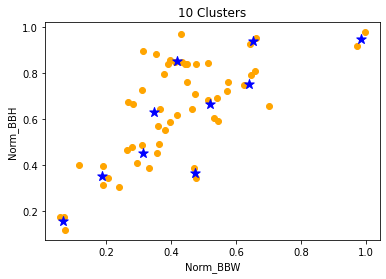

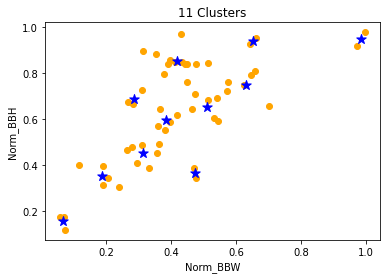

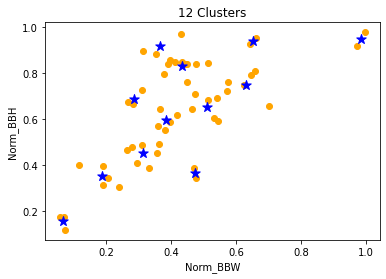

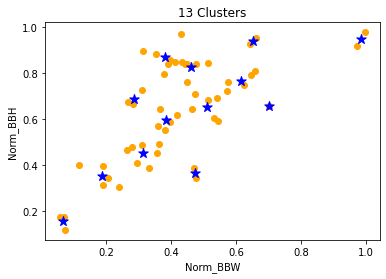

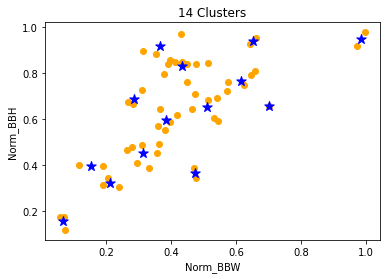

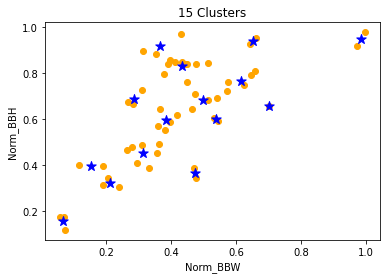

In [54]:
for i in range(1,16):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=50, n_init=10, random_state=0)
  pred_y = kmeans.fit_predict(bb)
  plt.scatter(bb[:,0], bb[:,1], c='orange')
  plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='blue',marker='*')
  plt.title(f"{i} Clusters")
  plt.xlabel("Norm_BBW")
  plt.ylabel("Norm_BBH")
  plt.show()


In [44]:
kmeans.cluster_centers_[:, :]

array([[0.61503693, 0.76672316],
       [0.31453183, 0.45362269],
       [0.06747231, 0.15583333],
       [0.43409447, 0.83240221],
       [0.98318182, 0.94809936],
       [0.28706496, 0.68913779],
       [0.49833333, 0.6820051 ],
       [0.21191919, 0.32090814],
       [0.47274972, 0.36567953],
       [0.65285266, 0.94149237],
       [0.38419918, 0.5947773 ],
       [0.36484848, 0.91803279],
       [0.15349954, 0.3976784 ],
       [0.70181818, 0.6557377 ],
       [0.53939394, 0.60051466]])

In [45]:
def iou(box, cent):
    I = np.minimum(cent[:, 0], box[0]) * np.minimum(cent[:, 1], box[1])
    box_area = box[0] * box[1]
    centroid_area = cent[:, 0]* cent[:, 1]
    U = box_area + centroid_area - I
    iou = I / U
    return (np.max(iou), np.argmax(iou))



In [46]:
def plotIOU(X, Y):
  plt.scatter(X, Y)
  plt.plot(X, Y)
  plt.xlabel("#Centroids")
  plt.ylabel("Mean Average Precision")
  plt.xticks(np.arange(1, 16))
  plt.show()

In [47]:
cent = {}
cluster = {}
miou = []
K = range(1, 16)

for k in K:
  kmeansModel = KMeans(n_clusters=k).fit(bb)
  cent[k] = kmeansModel.cluster_centers_
  maxiou = np.array([iou(box, cent[k])  for box in bb])
  cluster[k] = maxiou[:, 1].astype(np.uint8)
  miou.append(np.mean(maxiou[:, 0]))

In [48]:
cluster

{1: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8),
 2: array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=uint8),
 3: array([2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2,
        2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2,
        2, 1, 1, 1, 1, 1, 1, 2, 1, 2], dtype=uint8),
 4: array([2, 3, 3, 1, 2, 2, 2, 2, 1, 2, 3, 1, 1, 1, 3, 1, 1, 1, 3, 2, 2, 2,
        3, 2, 3, 0, 0, 0, 2, 2, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3,
        3, 0, 3, 0, 0, 0, 3, 2, 0, 2], dtype=uint8),
 5: array([0, 1, 1, 3, 4, 4, 4, 4, 0, 4, 1, 0, 3, 0, 1, 0, 0, 0, 1, 4, 0, 4,
        1, 0, 4, 2, 2, 2, 0, 4, 1, 1, 4, 0, 0, 1, 4, 1, 4, 0, 1, 4, 4, 1,
        1, 2, 1, 2, 2, 2, 1, 4, 2

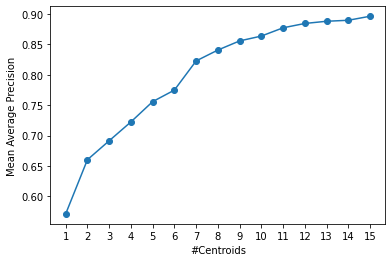

In [49]:
plotIOU(K, miou)

As mentioned before, #7 clusters can be reasoned to be the optimum number of clusters from mAP also.

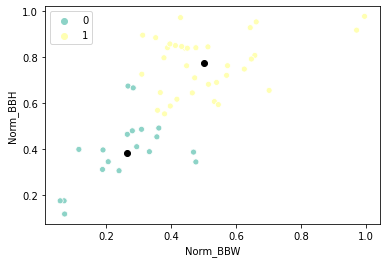

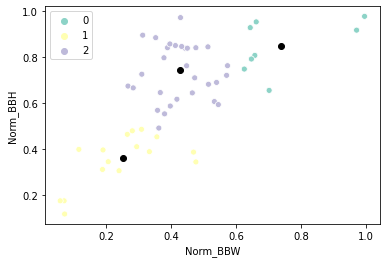

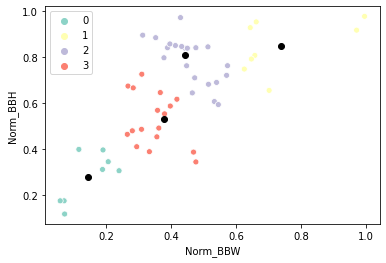

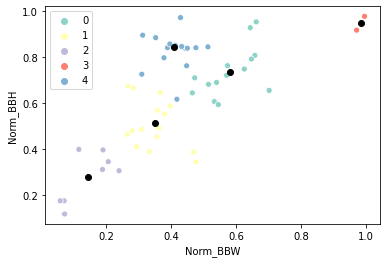

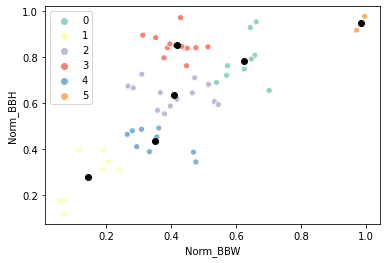

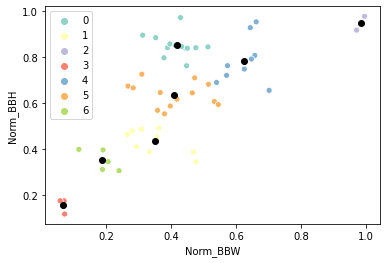

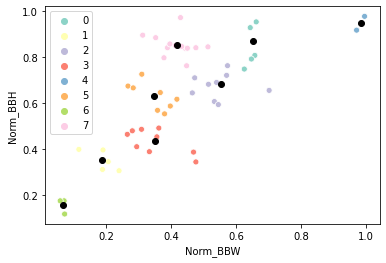

In [50]:
import seaborn as sns
def plotclusters(k):
  pt = sns.scatterplot(x, y, data=splot, hue=cluster[k], palette="Set3")
  pt.scatter(cent[k][:,0], cent[k][:,1], marker='o', c='black')
  plt.show()

for k in range(2,9):
  plotclusters(k)